In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
# importing library for dealing ipaddress
import ipaddress
from ipaddress import IPv4Address
# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
# representation of model layers
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# NF-CSE-CIC-IDS2018


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/NF-CSE-CIC-IDS2018.csv') 
df.drop(df.index[-1],axis=0,inplace=True)

In [ ]:
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,0,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,0,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,0,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,0,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392395,122.226.181.164,40810,172.31.69.7,22,6,0.000,1963,0,16,0,27,0,0,Benign
8392396,172.31.69.7,22,122.226.181.164,40810,6,0.000,2601,0,12,0,27,0,0,Benign
8392397,45.70.167.112,15476,172.31.69.7,23,6,0.000,44,0,1,0,2,0,0,Benign
8392398,172.31.69.7,23,45.70.167.112,15476,6,0.000,40,0,1,0,20,0,0,Benign


In [ ]:
df.drop(df.index[1844166],axis=0,inplace=True)
df.drop(df.index[7795208],axis=0,inplace=True)
df

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,172.31.66.17,51128,23.36.69.189,443,6,91.000,152,0,3,0,194,4285680,0,Benign
1,34.195.59.178,443,172.31.66.17,51036,6,91.178,994,979,7,7,24,4234714,0,Benign
2,112.215.171.212,12262,172.31.66.17,445,6,0.000,585,344,5,4,30,4294106,0,Benign
3,172.31.66.17,61023,172.31.0.2,53,17,0.000,136,168,2,2,0,4293985,0,Benign
4,34.204.112.168,443,172.31.66.17,51037,6,91.178,72,40,1,1,24,4294845,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392395,122.226.181.164,40810,172.31.69.7,22,6,0.000,1963,0,16,0,27,0,0,Benign
8392396,172.31.69.7,22,122.226.181.164,40810,6,0.000,2601,0,12,0,27,0,0,Benign
8392397,45.70.167.112,15476,172.31.69.7,23,6,0.000,44,0,1,0,2,0,0,Benign
8392398,172.31.69.7,23,45.70.167.112,15476,6,0.000,40,0,1,0,20,0,0,Benign


In [ ]:
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label', 'Attack'],
      dtype='object')

In [ ]:
df.dtypes

IPV4_SRC_ADDR                  object
L4_SRC_PORT                     int64
IPV4_DST_ADDR                  object
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Label                           int64
Attack                         object
dtype: object

In [ ]:
df.Attack.value_counts()

Benign                      7373195
DDoS attacks-LOIC-HTTP       378199
FTP-BruteForce               193360
DoS attacks-Hulk             108136
DoS attacks-SlowHTTPTest     105550
SSH-Bruteforce                94237
Infilteration                 62072
DoS attacks-GoldenEye         32850
DoS attacks-Slowloris         22825
Bot                           15683
Brute Force -Web               2613
Brute Force -XSS               1745
DDOS attack-LOIC-UDP           1667
DDOS attack-HOIC                230
SQL Injection                    36
Name: Attack, dtype: int64

In [ ]:
def change_label(df):
  df.Attack.replace(['DDoS attacks-LOIC-HTTP', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest', 'DoS attacks-GoldenEye', 
                    'DoS attacks-Slowloris', 'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC'],'Dos',inplace=True)
  df.Attack.replace(['FTP-BruteForce', 'SSH-Bruteforce', 'Brute Force -Web'],'Probe',inplace=True)
  df.Attack.replace(['SQL Injection', 'Brute Force -XSS'],'U2R',inplace=True)
  df.Attack.replace(['Benign'],'Normal',inplace=True)
  df.Attack.replace(['Bot', 'Infilteration'],'R2L',inplace=True)
change_label(df)
df.Attack.value_counts()

Normal    7373195
Dos        649457
Probe      290210
R2L         77755
U2R          1781
Name: Attack, dtype: int64

In [ ]:
# df.drop(df.loc[df['Attack']=='Normal'].index[:6900000], axis=0, inplace=True)
# df.drop(df.loc[df['Attack']=='Dos'].index[:520000], axis=0, inplace=True)
# df.drop(df.loc[df['Attack']=='Probe'].index[:100000], axis=0, inplace=True)
# df.drop(df.loc[df['Attack']=='R2L'].index[:30000], axis=0, inplace=True)

In [ ]:
df.Attack.value_counts()

Normal    7373195
Dos        649457
Probe      290210
R2L         77755
U2R          1781
Name: Attack, dtype: int64

In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(", ".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
analyze(df)


8392398 rows
** IPV4_SRC_ADDR:75404 (0%)
** L4_SRC_PORT:65010 (0%)
** IPV4_DST_ADDR:26301 (0%)
** L4_DST_PORT:65092 (0%)
** PROTOCOL:[6:73.54%, 17:25.86%, 1:0.46%, 2:0.07%, 58:0.07%, 47:0.0%, 0:0.0%]
** L7_PROTO:237 (0%)
** IN_BYTES:34677 (0%)
** OUT_BYTES:66601 (0%)
** IN_PKTS:4659 (0%)
** OUT_PKTS:2839 (0%)
** TCP_FLAGS:[0:26.46%, 27:11.14%, 20:10.11%, 222:9.33%, 219:8.97%, 2:6.95%, 24:6.58%, 30:5.69%, 218:3.2%, 223:1.97%, 25:1.76%, 23:1.63%, 31:1.31%, 26:1.17%, 17:0.87%, 29:0.62%, 22:0.38%, 211:0.35%, 214:0.31%, 18:0.27%, 28:0.24%, 16:0.19%, 194:0.14%, 19:0.08%, 6:0.08%, 4:0.07%, 21:0.03%, 215:0.02%, 210:0.02%, 90:0.02%, 91:0.01%, 148:0.0%, 157:0.0%, 10:0.0%, 152:0.0%, 83:0.0%, 41:0.0%, 208:0.0%, 94:0.0%, 156:0.0%, 43:0.0%, 82:0.0%, 149:0.0%, 86:0.0%, 61:0.0%, 153:0.0%, 198:0.0%, 158:0.0%]
** FLOW_DURATION_MILLISECONDS:80199 (0%)
** Label:[0:87.86%, 1:12.14%]
** Attack:[Normal:87.86%, Dos:7.74%, Probe:3.46%, R2L:0.93%, U2R:0.02%]


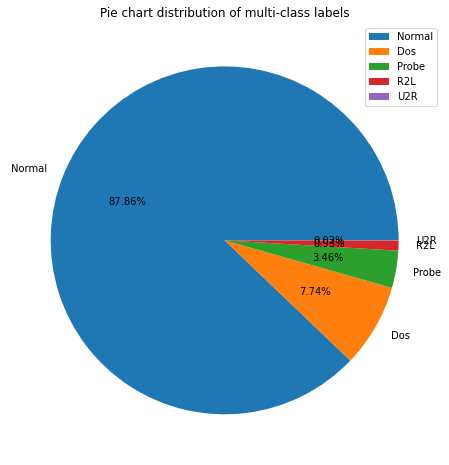

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df.Attack.value_counts(),labels=['Normal', 'Dos', 'Probe', 'R2L', 'U2R'],autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.show()

In [ ]:
def IP_deal(df, len):
    arr1 = df.IPV4_SRC_ADDR; arr2 = df.IPV4_DST_ADDR
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    for i in range(len):
      try:
        arr1[i] = int(ipaddress.IPv4Address(arr1[i]))
        arr2[i] = int(ipaddress.IPv4Address(arr2[i]))
      except:
        print(arr1[i], i)
        print(arr2[i], i)
    df.IPV4_SRC_ADDR = arr1.reshape(len,1)
    df.IPV4_DST_ADDR = arr2.reshape(len,1)
    return df

df = IP_deal(df, df.shape[0])
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,2887729681,51128,388253117,443,6,91.000,152,0,3,0,194,4285680,0,Normal
1,583220146,443,2887729681,51036,6,91.178,994,979,7,7,24,4234714,0,Normal
2,1893182420,12262,2887729681,445,6,0.000,585,344,5,4,30,4294106,0,Normal
3,2887729681,61023,2887712770,53,17,0.000,136,168,2,2,0,4293985,0,Normal
4,583823528,443,2887729681,51037,6,91.178,72,40,1,1,24,4294845,0,Normal


In [ ]:
numeric_col = df.select_dtypes(include='number').columns
numeric_col

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'L7_PROTO', 'IN_BYTES',
       'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS', 'TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [ ]:
df.dtypes

IPV4_SRC_ADDR                  object
L4_SRC_PORT                     int64
IPV4_DST_ADDR                  object
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Label                           int64
Attack                         object
dtype: object

In [ ]:
df.IPV4_SRC_ADDR = pd.to_numeric(df.IPV4_SRC_ADDR)
df.IPV4_DST_ADDR = pd.to_numeric(df.IPV4_DST_ADDR)
df.dtypes

IPV4_SRC_ADDR                   int64
L4_SRC_PORT                     int64
IPV4_DST_ADDR                   int64
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Label                           int64
Attack                         object
dtype: object

In [ ]:

numeric_col = df.select_dtypes(include='number').columns

std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

data = normalization(df.copy(),numeric_col)
data.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,Attack
0,0.451583,0.390872,-1.984851,-0.453166,-0.570070,2.018234,-0.027630,-0.016851,-0.018695,-0.033282,1.458887,0.715855,-0.371794,Normal
1,-1.777374,-1.911674,0.445502,2.425901,-0.570070,2.023228,-0.021185,-0.013056,-0.016641,0.006210,-0.450245,0.690751,-0.371794,Normal
2,-0.510359,-1.374754,0.445502,-0.453052,-0.570070,-0.534687,-0.024316,-0.015518,-0.017668,-0.010715,-0.382864,0.720005,-0.371794,Normal
3,0.451583,0.840387,0.445486,-0.475359,1.627921,-0.534687,-0.027753,-0.016200,-0.019208,-0.021998,-0.719770,0.719945,-0.371794,Normal
4,-1.776791,-1.911674,0.445502,2.425958,-0.570070,2.023228,-0.028243,-0.016696,-0.019721,-0.027640,-0.450245,0.720369,-0.371794,Normal


In [ ]:
  data.shape[1]

14

In [ ]:
multi_data = data.copy()
multi_label = pd.DataFrame(multi_data.Attack)

le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#np.save("/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/labels/le2_classes.npy",le2.classes_,allow_pickle=True)

multi_data = pd.get_dummies(multi_data,columns=['Attack'],prefix="",prefix_sep="") 
multi_data['Attack'] = multi_label
multi_data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,intrusion,Dos,Normal,Probe,R2L,U2R,Attack
0,0.451583,0.390872,-1.984851,-0.453166,-0.570070,2.018234,-0.027630,-0.016851,-0.018695,-0.033282,1.458887,0.715855,-0.371794,1,0,1,0,0,0,Normal
1,-1.777374,-1.911674,0.445502,2.425901,-0.570070,2.023228,-0.021185,-0.013056,-0.016641,0.006210,-0.450245,0.690751,-0.371794,1,0,1,0,0,0,Normal
2,-0.510359,-1.374754,0.445502,-0.453052,-0.570070,-0.534687,-0.024316,-0.015518,-0.017668,-0.010715,-0.382864,0.720005,-0.371794,1,0,1,0,0,0,Normal
3,0.451583,0.840387,0.445486,-0.475359,1.627921,-0.534687,-0.027753,-0.016200,-0.019208,-0.021998,-0.719770,0.719945,-0.371794,1,0,1,0,0,0,Normal
4,-1.776791,-1.911674,0.445502,2.425958,-0.570070,2.023228,-0.028243,-0.016696,-0.019721,-0.027640,-0.450245,0.720369,-0.371794,1,0,1,0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392395,-0.347387,-0.077860,0.445503,-0.477123,-0.570070,-0.534687,-0.013767,-0.016851,-0.012022,-0.033282,-0.416555,-1.395058,-0.371794,1,0,1,0,0,0,Normal
8392396,0.451583,-1.930800,-0.357705,1.843976,-0.570070,-0.534687,-0.008883,-0.016851,-0.014075,-0.033282,-0.416555,-1.395058,-0.371794,1,0,1,0,0,0,Normal
8392397,-1.606772,-1.228747,0.445503,-0.477066,-0.570070,-0.534687,-0.028457,-0.016851,-0.019721,-0.033282,-0.697310,-1.395058,-0.371794,1,0,1,0,0,0,Normal
8392398,0.451583,-1.930754,-1.623768,0.402309,-0.570070,-0.534687,-0.028488,-0.016851,-0.019721,-0.033282,-0.495166,-1.395058,-0.371794,1,0,1,0,0,0,Normal


In [ ]:
multi_data.shape[1]

20

In [ ]:
multi_data.intrusion.value_counts()

1    7373195
0     649457
2     290210
3      77755
4       1781
Name: intrusion, dtype: int64

In [ ]:
numeric_multi = multi_data[numeric_col]
numeric_multi['intrusion'] = multi_data['intrusion']

corr = numeric_multi.corr()
corr_y = abs(corr['intrusion'])
highest_corr = corr_y[corr_y > 0.1]
highest_corr.sort_values(ascending=True)

<ipython-input-24-2fbbef84d961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['intrusion'] = multi_data['intrusion']


TCP_FLAGS                     0.144202
Label                         0.163964
FLOW_DURATION_MILLISECONDS    0.182597
IPV4_SRC_ADDR                 0.233399
intrusion                     1.000000
Name: intrusion, dtype: float64

In [ ]:
multi_data.shape[1]

20

In [ ]:
#numerical_data = multi_data[['L4_SRC_PORT', 'L7_PROTO', 'L4_DST_PORT', 'PROTOCOL', 'FLOW_DURATION_MILLISECONDS']]
#multi_data = numerical_data.join(multi_data[['intrusion', 'R2L', 'Dos', 'Normal', 'Probe', 'U2R', 'Attack']])
# multi_data.rename(columns={'Attack':'Label'}, inplace=True)
multi_data

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label,intrusion,Dos,Normal,Probe,R2L,U2R,Attack
0,0.451583,0.390872,-1.984851,-0.453166,-0.570070,2.018234,-0.027630,-0.016851,-0.018695,-0.033282,1.458887,0.715855,-0.371794,1,0,1,0,0,0,Normal
1,-1.777374,-1.911674,0.445502,2.425901,-0.570070,2.023228,-0.021185,-0.013056,-0.016641,0.006210,-0.450245,0.690751,-0.371794,1,0,1,0,0,0,Normal
2,-0.510359,-1.374754,0.445502,-0.453052,-0.570070,-0.534687,-0.024316,-0.015518,-0.017668,-0.010715,-0.382864,0.720005,-0.371794,1,0,1,0,0,0,Normal
3,0.451583,0.840387,0.445486,-0.475359,1.627921,-0.534687,-0.027753,-0.016200,-0.019208,-0.021998,-0.719770,0.719945,-0.371794,1,0,1,0,0,0,Normal
4,-1.776791,-1.911674,0.445502,2.425958,-0.570070,2.023228,-0.028243,-0.016696,-0.019721,-0.027640,-0.450245,0.720369,-0.371794,1,0,1,0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392395,-0.347387,-0.077860,0.445503,-0.477123,-0.570070,-0.534687,-0.013767,-0.016851,-0.012022,-0.033282,-0.416555,-1.395058,-0.371794,1,0,1,0,0,0,Normal
8392396,0.451583,-1.930800,-0.357705,1.843976,-0.570070,-0.534687,-0.008883,-0.016851,-0.014075,-0.033282,-0.416555,-1.395058,-0.371794,1,0,1,0,0,0,Normal
8392397,-1.606772,-1.228747,0.445503,-0.477066,-0.570070,-0.534687,-0.028457,-0.016851,-0.019721,-0.033282,-0.697310,-1.395058,-0.371794,1,0,1,0,0,0,Normal
8392398,0.451583,-1.930754,-1.623768,0.402309,-0.570070,-0.534687,-0.028488,-0.016851,-0.019721,-0.033282,-0.495166,-1.395058,-0.371794,1,0,1,0,0,0,Normal


In [ ]:
# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df)

In [ ]:
 
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

y_train = X_train[['R2L', 'Dos', 'Normal', 'Probe', 'U2R']]
X_train = X_train.drop(['intrusion', 'R2L', 'Dos', 'Normal', 'Probe', 'U2R', 'Attack'],axis=1)

y_test = X_test[['R2L', 'Dos', 'Normal', 'Probe', 'U2R']]
X_test = X_test.drop(['intrusion', 'R2L', 'Dos', 'Normal', 'Probe', 'U2R', 'Attack'],axis=1)


In [ ]:
 X_train.shape[0]

6294298

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)

In [ ]:
 y_test.shape[1]

5

In [ ]:
y_test.shape[1]

5

In [ ]:
y_train

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
labels = np.where(df['Label'] == 0, 1, 0)
labels

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
X = multi_data.iloc[:,0:93]
Y = multi_data[['R2L', 'Dos', 'Normal', 'Probe', 'U2R']]

In [ ]:
# X_train = X_train.values
# X_test = X_test.values
# y_test = y_test.values

In [ ]:
X_train

array([[0.4907289 , 0.54033722, 0.67235185, ..., 0.        , 0.        ,
        0.        ],
       [0.7684027 , 0.05171283, 0.75561179, ..., 0.0896861 , 0.        ,
        0.        ],
       [0.76840303, 0.96229496, 0.67234802, ..., 0.        , 0.99999977,
        1.        ],
       ...,
       [0.76840296, 0.05171283, 0.83512728, ..., 0.0896861 , 0.        ,
        0.        ],
       [0.05907323, 0.72742809, 0.67235214, ..., 0.00896861, 0.        ,
        1.        ],
       [0.76840304, 0.82496376, 0.67234802, ..., 0.        , 0.99999977,
        0.        ]])

In [ ]:
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2, axis=1))
    #return MAE
    return np.mean(abs(v1 - v2), axis=1)

In [ ]:
def sample(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [ ]:
original_dim = X_train.shape[1]
input_shape = (original_dim,)
intermediate_dim = int(original_dim / 2)
latent_dim = int(original_dim / 3)

In [ ]:
original_dim

13

In [ ]:
intermediate_dim

6

In [ ]:
latent_dim

4

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
# importing library for dealing ipaddress
import ipaddress
from ipaddress import IPv4Address
# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

In [ ]:
# encoder model

inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
# use the reparameterization trick and get the output from the sample() function
# z = Lambda(sample, output_shape=(1,), name='z')([z_mean, z_log_var])
 
z = Lambda(sample, output_shape=(input_shape,), name='z')([z_mean, z_log_var])
 


encoder = Model(inputs, z, name='encoder')
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 13)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 6)            84          ['encoder_input[0][0]']          
                                                                                                  
 z_mean (Dense)                 (None, 4)            28          ['dense[0][0]']                  
                                                                                                  
 z_log_var (Dense)              (None, 4)            28          ['dense[0][0]']                  
                                                                                            

In [ ]:
# # creating model with input, encoding, decoding, output layers
# autoencoder = Model(inputs=inputs, outputs=z)

# # defining loss function, optimizer, metrics and then compiling model
# autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# # summary of model layers
# autoencoder.summary()

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# # training the model on training dataset
# monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
#                         patience=20, verbose=1, mode='auto',
#                            restore_best_weights=True)
# history = autoencoder.fit(X_train, X_train, epochs=1,batch_size=500,validation_data=(X_test, X_test),callbacks=monitor).history

In [ ]:
# autoencoder.summary()

In [ ]:
# decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)
# Instantiate the decoder model:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 4)]               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 30        
                                                                 
 dense_2 (Dense)             (None, 13)                91        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# full VAE model
outputs = decoder(encoder(inputs))
vae_model = Model(inputs, outputs, name='vae_mlp')

In [ ]:
# the KL loss function:
def vae_loss(x, x_decoded_mean):
    # compute the average MSE error, then scale it up, ie. simply sum on all axes
    reconstruction_loss = K.sum(K.square(x - x_decoded_mean))
    # compute the KL loss
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.square(K.exp(z_log_var)), axis=-1)
    # return the average loss over all 
    total_loss = K.mean(reconstruction_loss + kl_loss)    
    #total_loss = reconstruction_loss + kl_loss
    return total_loss

In [ ]:
X_train 

array([[0.4907289 , 0.54033722, 0.67235185, ..., 0.        , 0.        ,
        0.        ],
       [0.7684027 , 0.05171283, 0.75561179, ..., 0.0896861 , 0.        ,
        0.        ],
       [0.76840303, 0.96229496, 0.67234802, ..., 0.        , 0.99999977,
        1.        ],
       ...,
       [0.76840296, 0.05171283, 0.83512728, ..., 0.0896861 , 0.        ,
        0.        ],
       [0.05907323, 0.72742809, 0.67235214, ..., 0.00896861, 0.        ,
        1.        ],
       [0.76840304, 0.82496376, 0.67234802, ..., 0.        , 0.99999977,
        0.        ]])

In [ ]:
opt = optimizers.Adam(learning_rate=3e-5, clipvalue=0.5)
#opt = optimizers.RMSprop(learning_rate=0.0001)

vae_model.compile(optimizer=opt, loss=vae_loss,metrics=['accuracy'])
vae_model.summary()
# Finally, we train the model:
results = vae_model.fit(X_train, X_train ,shuffle=True,epochs=10,batch_size=64,validation_data=(X_test, X_test)).history

Model: "vae_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 13)]              0         
                                                                 
 encoder (Functional)        (None, 4)                 140       
                                                                 
 decoder (Functional)        (None, 13)                121       
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
Train on 6294298 samples, validate on 2098100 samples
Epoch 1/10
6294272/6294298 [============================>.] - ETA: 0s - loss: 32.6759 - accuracy: 0.7007

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6294298/6294298 [==============================] - 165s 26us/sample - loss: 32.6757 - accuracy: 0.7007 - val_loss: 12.3859 - val_accuracy: 0.8253
Epoch 2/10
6294298/6294298 [==============================] - 159s 25us/sample - loss: 11.1498 - accuracy: 0.8373 - val_loss: 10.5589 - val_accuracy: 0.8528
Epoch 3/10
6294298/6294298 [==============================] - 155s 25us/sample - loss: 10.4657 - accuracy: 0.8577 - val_loss: 10.3076 - val_accuracy: 0.8602
Epoch 4/10
6294298/6294298 [==============================] - 154s 24us/sample - loss: 10.0149 - accuracy: 0.8646 - val_loss: 9.6294 - val_accuracy: 0.8734
Epoch 5/10
6294298/6294298 [==============================] - 153s 24us/sample - loss: 9.3385 - accuracy: 0.8815 - val_loss: 9.1655 - val_accuracy: 0.8876
Epoch 6/10
6294298/6294298 [==============================] - 154s 24us/sample - loss: 9.0479 - accuracy: 0.8900 - val_loss: 8.9428 - val_accuracy: 0.8905
Epoch 7/10
6294298/6294298 [==============================] - 152s 24us/sa

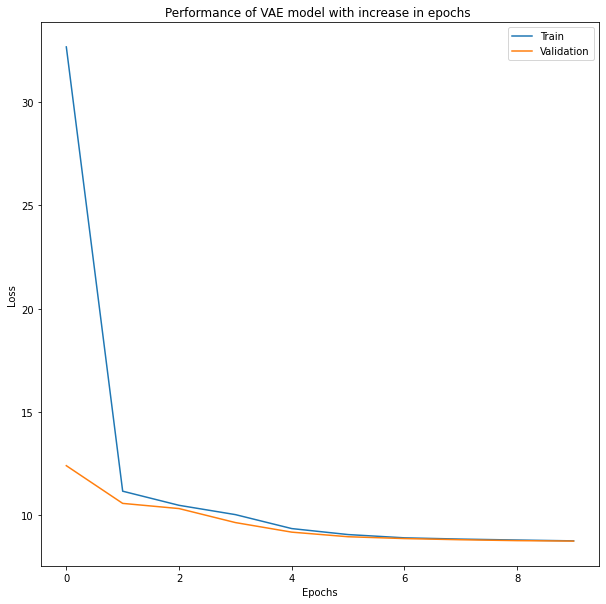

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(vae_model.history.history['loss'])
plt.plot(vae_model.history.history['val_loss'])
plt.title("Performance of VAE model with increase in epochs ")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [ ]:
vae_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = vae_model.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

Test results - Loss: 0.005078559071623689 - Accuracy: 88.89919519424438%


In [ ]:
 predictions = vae_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


# AE Classifier

In [ ]:
 
inputs = Input(shape=predictions.shape[1])
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z = Lambda(sample, output_shape=(input_shape,), name='z')([z_mean, z_log_var])

encoder1 = Model(inputs, z, name='encoder')
encoder1.summary()
 


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 13)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 6)            84          ['input_1[0][0]']                
                                                                                                  
 z_mean (Dense)                 (None, 4)            28          ['dense_3[0][0]']                
                                                                                                  
 z_log_var (Dense)              (None, 4)            28          ['dense_3[0][0]']                
                                                                                            

In [ ]:

latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(5, activation='sigmoid')(x)
 
decoder1 = Model(latent_inputs, outputs, name='decoder')
decoder1.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 6)                 30        
                                                                 
 dense_5 (Dense)             (None, 5)                 35        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# full VAE model
outputs = decoder1(encoder1(inputs))
vae_model1 = Model(inputs, outputs, name='vae_mlp')

In [ ]:

vae_model1.compile(optimizer=opt, loss=vae_loss,metrics=['accuracy'])

his  =  vae_model1.fit(predictions,y_test,shuffle=True,epochs=10,batch_size=64,validation_split=0.2).history

Train on 1678480 samples, validate on 419620 samples
Epoch 1/10
1678480/1678480 [==============================] - 40s 24us/sample - loss: 15.3879 - accuracy: 0.8834 - val_loss: 6.8295 - val_accuracy: 0.9501
Epoch 2/10
1678480/1678480 [==============================] - 40s 24us/sample - loss: 6.0485 - accuracy: 0.9512 - val_loss: 5.5858 - val_accuracy: 0.9516
Epoch 3/10
1678480/1678480 [==============================] - 43s 26us/sample - loss: 5.3515 - accuracy: 0.9520 - val_loss: 5.1382 - val_accuracy: 0.9523
Epoch 4/10
1678480/1678480 [==============================] - 40s 24us/sample - loss: 5.0174 - accuracy: 0.9524 - val_loss: 4.8672 - val_accuracy: 0.9528
Epoch 5/10
1678480/1678480 [==============================] - 40s 24us/sample - loss: 4.8085 - accuracy: 0.9525 - val_loss: 4.7019 - val_accuracy: 0.9526
Epoch 6/10
1678480/1678480 [==============================] - 39s 23us/sample - loss: 4.6686 - accuracy: 0.9525 - val_loss: 4.6020 - val_accuracy: 0.9525
Epoch 7/10
1678480/167

In [ ]:
vae_model1.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
# predicting target attribute on testing dataset
test_results = vae_model1.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')
 

Test results - Loss: 0.011279946622733877 - Accuracy: 95.38053274154663%


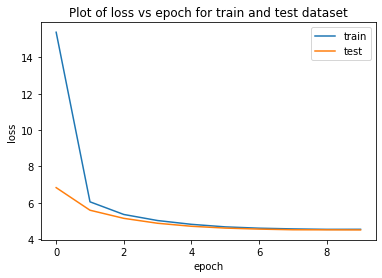

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(his['loss'])
plt.plot(his['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/plots/ae_classifier_multi_loss.png')
plt.show()

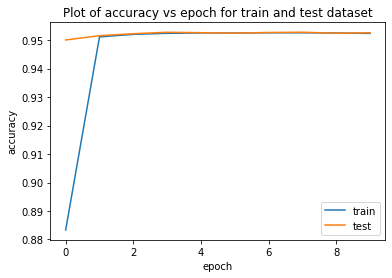

In [ ]:
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
# plt.savefig('/content/drive/MyDrive/Colab Notebooks/IDS-AutoEncoder/plots/ae_classifier_multi_accuracy.png')
plt.show()

In [ ]:
n_classes = len(le2.classes_)
y_pred = vae_model1.predict(X_test)

In [ ]:
fpr_ae = dict()
tpr_ae = dict()
roc_auc_ae = dict()
for i in range(n_classes):
    fpr_ae[i], tpr_ae[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc_ae[i] = auc(fpr_ae[i], tpr_ae[i])

In [ ]:
for j in range(0,y_pred.shape[1]):
  for i in range(0,y_pred.shape[0]):
    y_pred[i][j] = int(round(y_pred[i][j]))

In [ ]:
print("Recall Score - ",recall_score(y_test,y_pred.astype('uint8'),average='micro'))
print("F1 Score - ",f1_score(y_test,y_pred.astype('uint8'),average='micro'))
print("Precision Score - ",precision_score(y_test,y_pred.astype('uint8'),average='micro'))

Recall Score -  0.9474138506267575
F1 Score -  0.957954731378856
Precision Score -  0.9687328057966974


In [ ]:
from sklearn.metrics import classification_report
attack_name = ["R2L","Dos","normal","Probe","U2R"]
print(classification_report(y_test, y_pred, target_names=attack_name, digits=4))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         R2L     0.0000    0.0000    0.0000     19445
         Dos     0.7078    0.9242    0.8017    162335
      normal     0.9993    0.9971    0.9982   1843057
       Probe     0.0972    0.0013    0.0025     72810
         U2R     0.0000    0.0000    0.0000       453

   micro avg     0.9687    0.9474    0.9580   2098100
   macro avg     0.3609    0.3845    0.3605   2098100
weighted avg     0.9359    0.9474    0.9389   2098100
 samples avg     0.9474    0.9474    0.9474   2098100



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
